In [ ]:
pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
superstore_data = pd.read_csv('SuperStore.csv')

In [5]:
superstore_data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [6]:
superstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [25]:
superstore_data.Category.value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [29]:
# Agg Function
def custom_agg(x):
    return x.sum()

In [50]:
# Implementation Of Agg Function
result = superstore_data.groupby(['Category','Sub-Category'])['Sales'].agg(custom_agg)

In [51]:
result_df = pd.DataFrame(result)
result_df

Sales
Category        Sub-Category             
Furniture       Bookcases     113813.1987
                Chairs        322822.7310
                Furnishings    89212.0180
                Tables        202810.6280
Office Supplies Appliances    104618.4030
                Art            26705.4100
                Binders       200028.7850
                Envelopes      16128.0460
                Fasteners       3001.9600
                Labels         12347.7260
                Paper          76828.3040
                Storage       219343.3920
                Supplies       46420.3080
Technology      Accessories   164186.7000
                Copiers       146248.0940
                Machines      189238.6310
                Phones        327782.4480

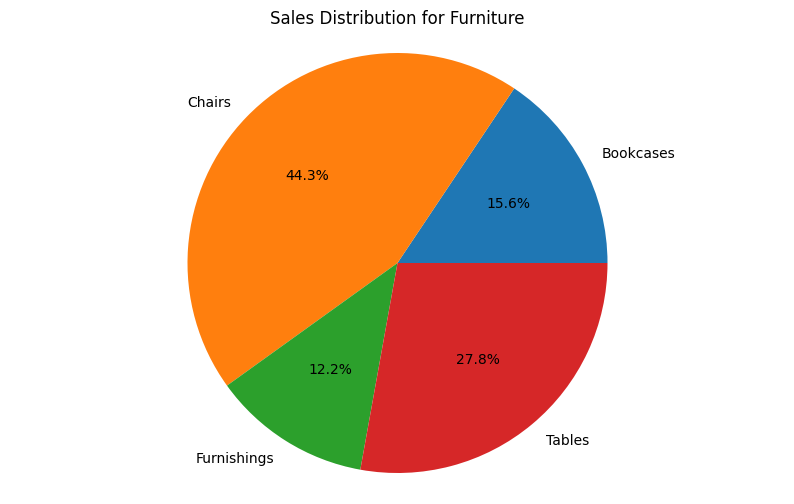

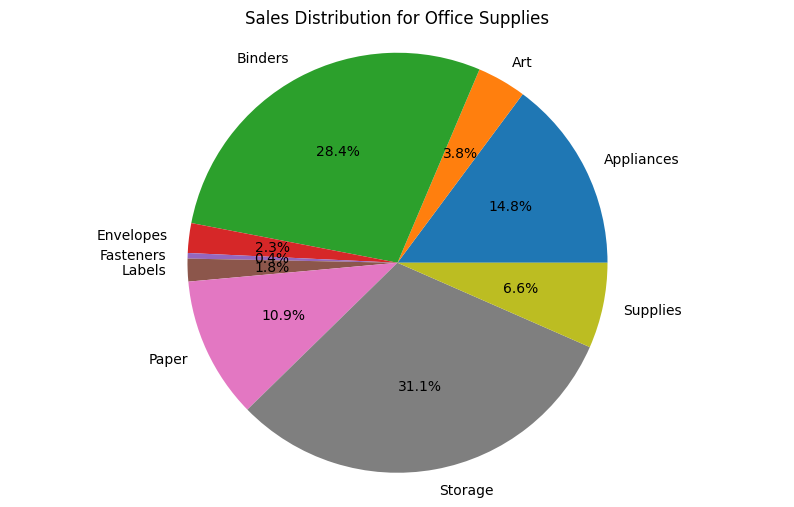

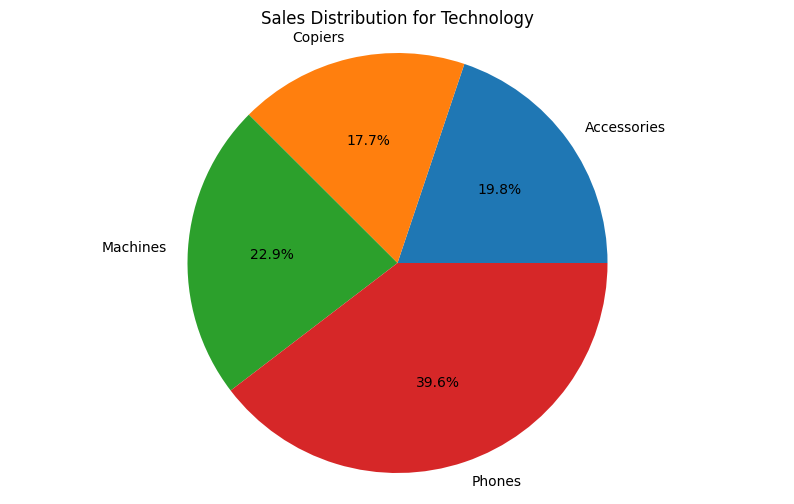

In [52]:

for category in result_df.index.get_level_values(0).unique():
    category_sales = result_df.loc[category]
    plt.figure(figsize=(10, 6))
    plt.pie(category_sales['Sales'], labels=category_sales.index, autopct='%1.1f%%')
    plt.title(f'Sales Distribution for {category}', fontsize=12)
    plt.axis('equal')  
    plt.show()

